In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


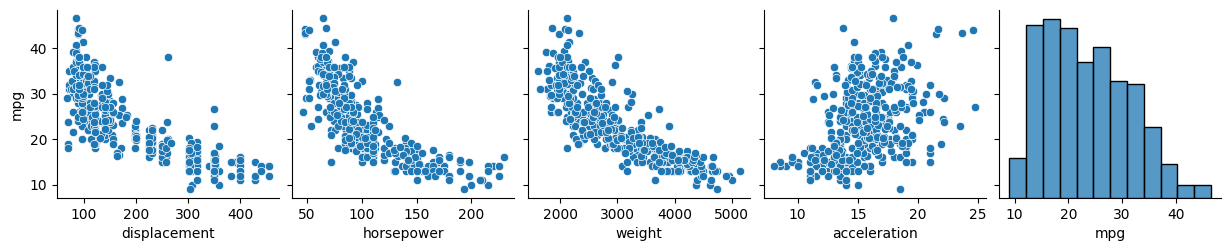

In [13]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

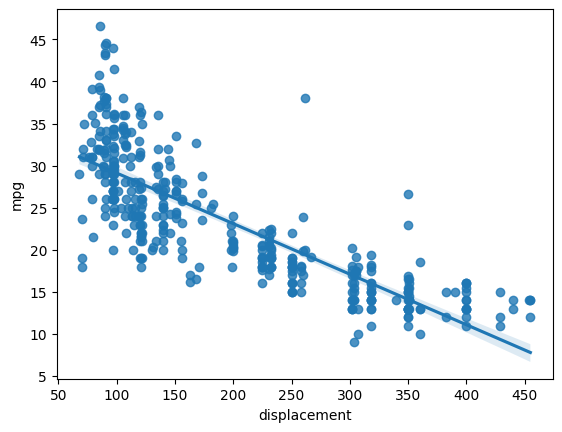

In [16]:
sns.regplot(x='displacement',y='mpg',data=df)

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
y=df['mpg']

In [19]:
X = df[['displacement','horsepower','weight','acceleration']]

In [20]:
X.shape

(392, 4)

In [21]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [25]:
X = ss.fit_transform(X)

In [26]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [27]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [28]:
# Now mean is zero and standard deviation is one

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=3452)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr_model = LinearRegression()

In [33]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [34]:
lr_model.intercept_

23.321887879855804

In [35]:
lr_model.coef_

array([-0.88454447, -1.85971467, -4.12605805, -0.47285043])

In [36]:
y_pred = lr_model.predict(X_test)

In [37]:
y_pred

array([25.63780071, 11.46396995, 28.90370653, 25.8066174 , 27.30017228,
       15.83914879, 31.79298212, 23.29973979, 17.27488323, 25.27526701,
       27.69307522, 32.10280608,  9.82167366, 31.02770957, 15.70907263,
       21.25878361, 30.44613726, 28.96483262, 25.06246219, 16.65916359,
        7.9020268 , 29.05076602, 27.61589054, 26.71591159, 28.7264429 ,
       14.61240187, 29.12075919, 21.27819683, 24.22165532, 30.37151426,
       31.01102455, 24.79707177, 24.55372806, 26.25661002, 29.61351099,
       19.78227023, 23.45051784, 14.21091954, 26.03161433, 24.02880711,
       31.54114008, 29.25257881, 29.10657407, 30.18696534, 23.27246317,
       15.06959982, 20.62199191, 27.15979781, 27.85326515, 31.62779719,
       28.31929767, 28.37937973, 27.13011711, 18.62293748, 27.22777855,
       18.58440844, 30.22187984, 18.90963761, 26.61855103, 30.78742844,
       18.26298672, 32.1199673 , 20.79410414,  6.46645851, 24.02888627,
       15.79403143, 27.50737919, 16.55790205, 16.02229778, 31.79

In [38]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [39]:
mean_absolute_error(y_test,y_pred)

3.423998586718666

In [40]:
mean_absolute_percentage_error(y_test,y_pred)

0.14314013813548668

In [42]:
r2_score(y_test,y_pred)

0.6842529412893326